In [1]:
# importing libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
data.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [4]:
data.shape

(571, 43)

In [5]:
# Removing duplicates:
data=data.drop_duplicates(keep='first')
data.shape

(571, 43)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
# checking for missing values
data.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
#Imputing null values

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=imputer.fit_transform(data[i].values.reshape(-1,1))[:,0]





In [10]:
data.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [11]:
data.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [12]:
data=data.drop(columns=['Seat No.'])

In [13]:
#checking for unique categoriesz
column_names = data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : PH-121
------------------------------------------
A-    19.614711
A     19.439580
B+    10.683012
B      9.982487
B-     9.807356
D      7.705779
C      5.779335
C+     5.429072
D+     3.852890
A+     3.852890
C-     3.327496
WU     0.350263
F      0.175131
Name: PH-121, dtype: float64


Column Name        : HS-101
------------------------------------------
A-    14.360771
B-    13.660245
C     11.908932
B     11.033275
B+    10.332750
C-     8.756567
C+     8.231173
D      7.880911
A      6.654991
D+     6.304729
A+     0.700525
F      0.175131
Name: HS-101, dtype: float64


Column Name        : CY-105
------------------------------------------
A     31.173380
A-    21.015762
B+     8.756567
B      8.581436
B-     7.355517
D      5.429072
A+     5.429072
C      3.327496
C+     2.977233
C-     2.802102
D+     2.451839
WU     0.525394
F      0.175131
Name: CY-105, dtype: float64


Column Name        : HS-105/12
------------------------------------------
A     16.987

In [14]:
#Remomoving grades WU and I from the data as they refer to withdrawn from course and In progress(grade not awarded)   
for i in data.columns:
    data.drop(data[(data.loc[:,i]=='WU')| (data.loc[:,i]=='W')].index,inplace=True)
    

In [15]:
data.reset_index(drop=True,inplace=True)
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [16]:
data.nunique()

PH-121        12
HS-101        12
CY-105        11
HS-105/12     11
MT-111        12
CS-105        11
CS-106        11
EL-102        11
EE-119        11
ME-107        11
CS-107        11
HS-205/20     11
MT-222        12
EE-222        12
MT-224        11
CS-210        11
CS-211        12
CS-203        11
CS-214        11
EE-217        12
CS-212        11
CS-215        11
MT-331        12
EF-303        11
HS-304        12
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        12
CS-318        12
CS-306        12
CS-312        12
CS-317        12
CS-403        11
CS-421        12
CS-406        12
CS-414        12
CS-419        12
CS-423        12
CS-412        12
CGPA         470
dtype: int64

In [17]:
#checking for unique categoriesz
column_names = data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : PH-121
------------------------------------------
A-    20.475320
A     20.109689
B+    10.603291
B     10.237660
B-     9.689214
D      6.764168
C      5.667276
C+     5.484461
D+     4.021938
A+     4.021938
C-     2.742230
F      0.182815
Name: PH-121, dtype: float64


Column Name        : HS-101
------------------------------------------
A-    14.625229
B-    13.711152
C     12.248629
B     11.334552
B+    10.603291
C-     8.775137
C+     8.226691
D      7.312614
A      6.946984
D+     5.301645
A+     0.731261
F      0.182815
Name: HS-101, dtype: float64


Column Name        : CY-105
------------------------------------------
A     31.809872
A-    21.389397
B+     8.957952
B      8.409506
B-     7.129799
A+     5.667276
D      4.936015
C      3.473492
C-     2.925046
C+     2.742230
D+     2.559415
Name: CY-105, dtype: float64


Column Name        : HS-105/12
------------------------------------------
A     17.367459
A-    12.979890
B+    12.614260
B     10.237

In [18]:
c_data= data.drop(columns=['CGPA'])

<function matplotlib.pyplot.show(close=None, block=None)>

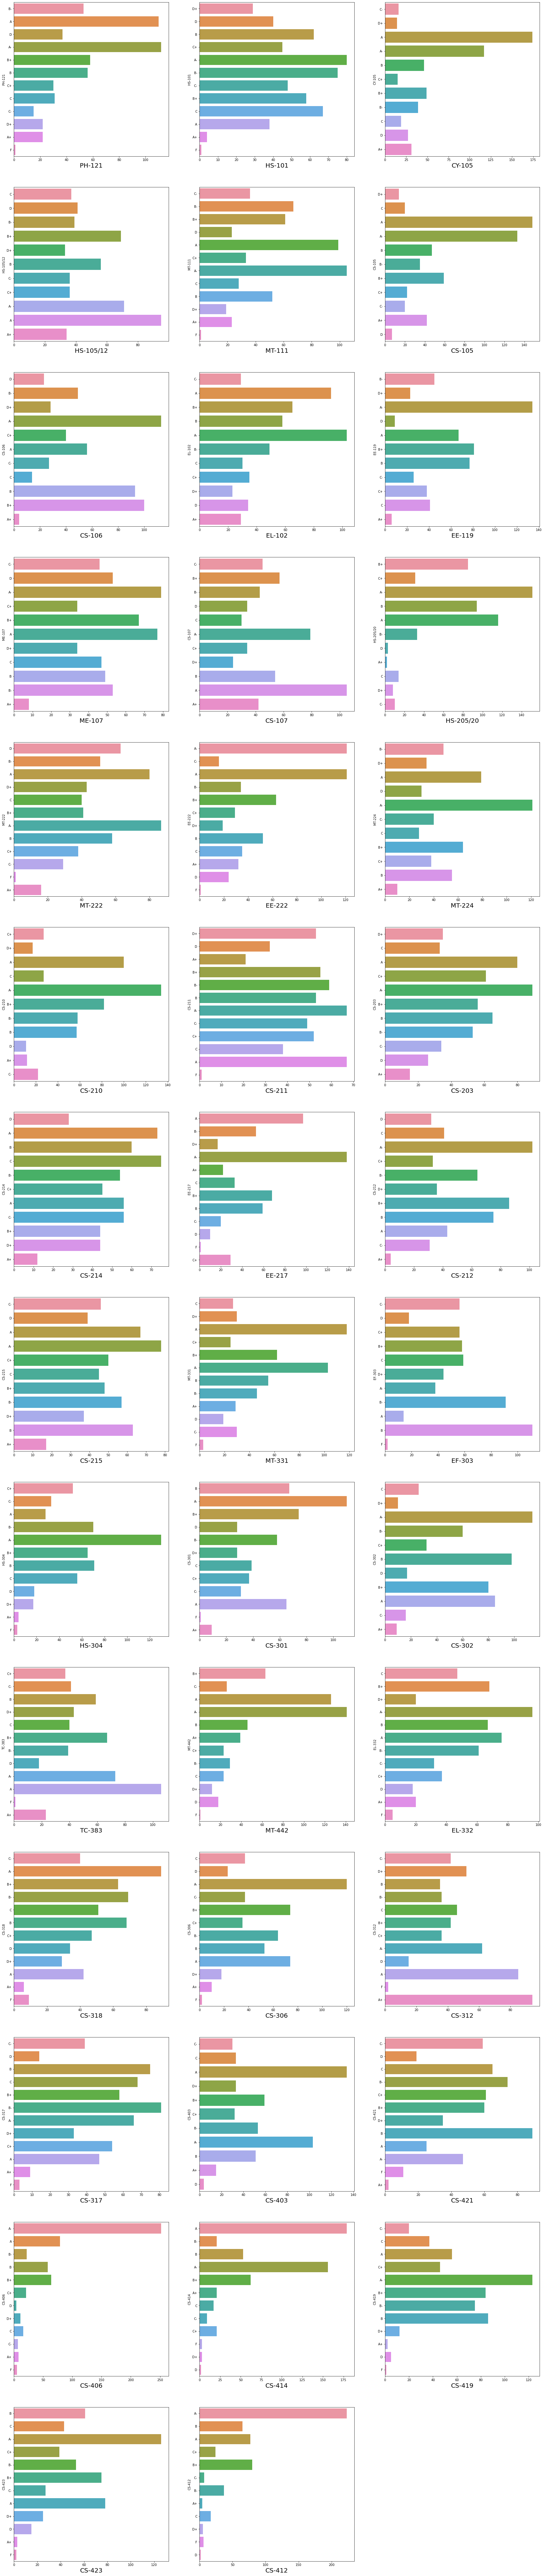

In [23]:
# Data Visualization:
#Univariate Analysis

plt.figure(figsize=(30,150))
plotnumber = 1
for column in c_data:
    if plotnumber <=41:
        ax= plt.subplot(14,3,plotnumber)
        sns.countplot(y=c_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [24]:
# Data Encoding
for column in data.columns:
    
    data[column]=data[column].replace('A+',4.0)
    data[column]=data[column].replace('A',4.0)
    data[column]=data[column].replace('A-',3.7)
    data[column]=data[column].replace('B+',3.4)
    data[column]=data[column].replace('B',3.0)
    data[column]=data[column].replace('B-',2.7)
    data[column]=data[column].replace('C+',2.4)
    data[column]=data[column].replace('C',2.0)
    data[column]=data[column].replace('C-',1.7)
    data[column]=data[column].replace('D+',1.4)
    data[column]=data[column].replace('D',1.0)
    data[column]=data[column].replace('F',0.0)


In [25]:
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [26]:
#Lets look at the label
label = data['CGPA']

<function matplotlib.pyplot.show(close=None, block=None)>

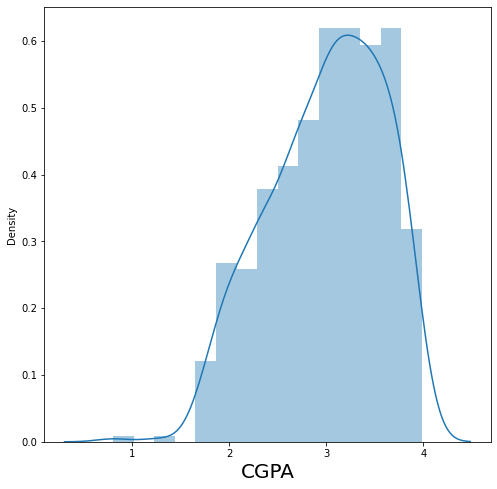

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(label)
plt.xlabel(column,fontsize=20)
    
plt.show

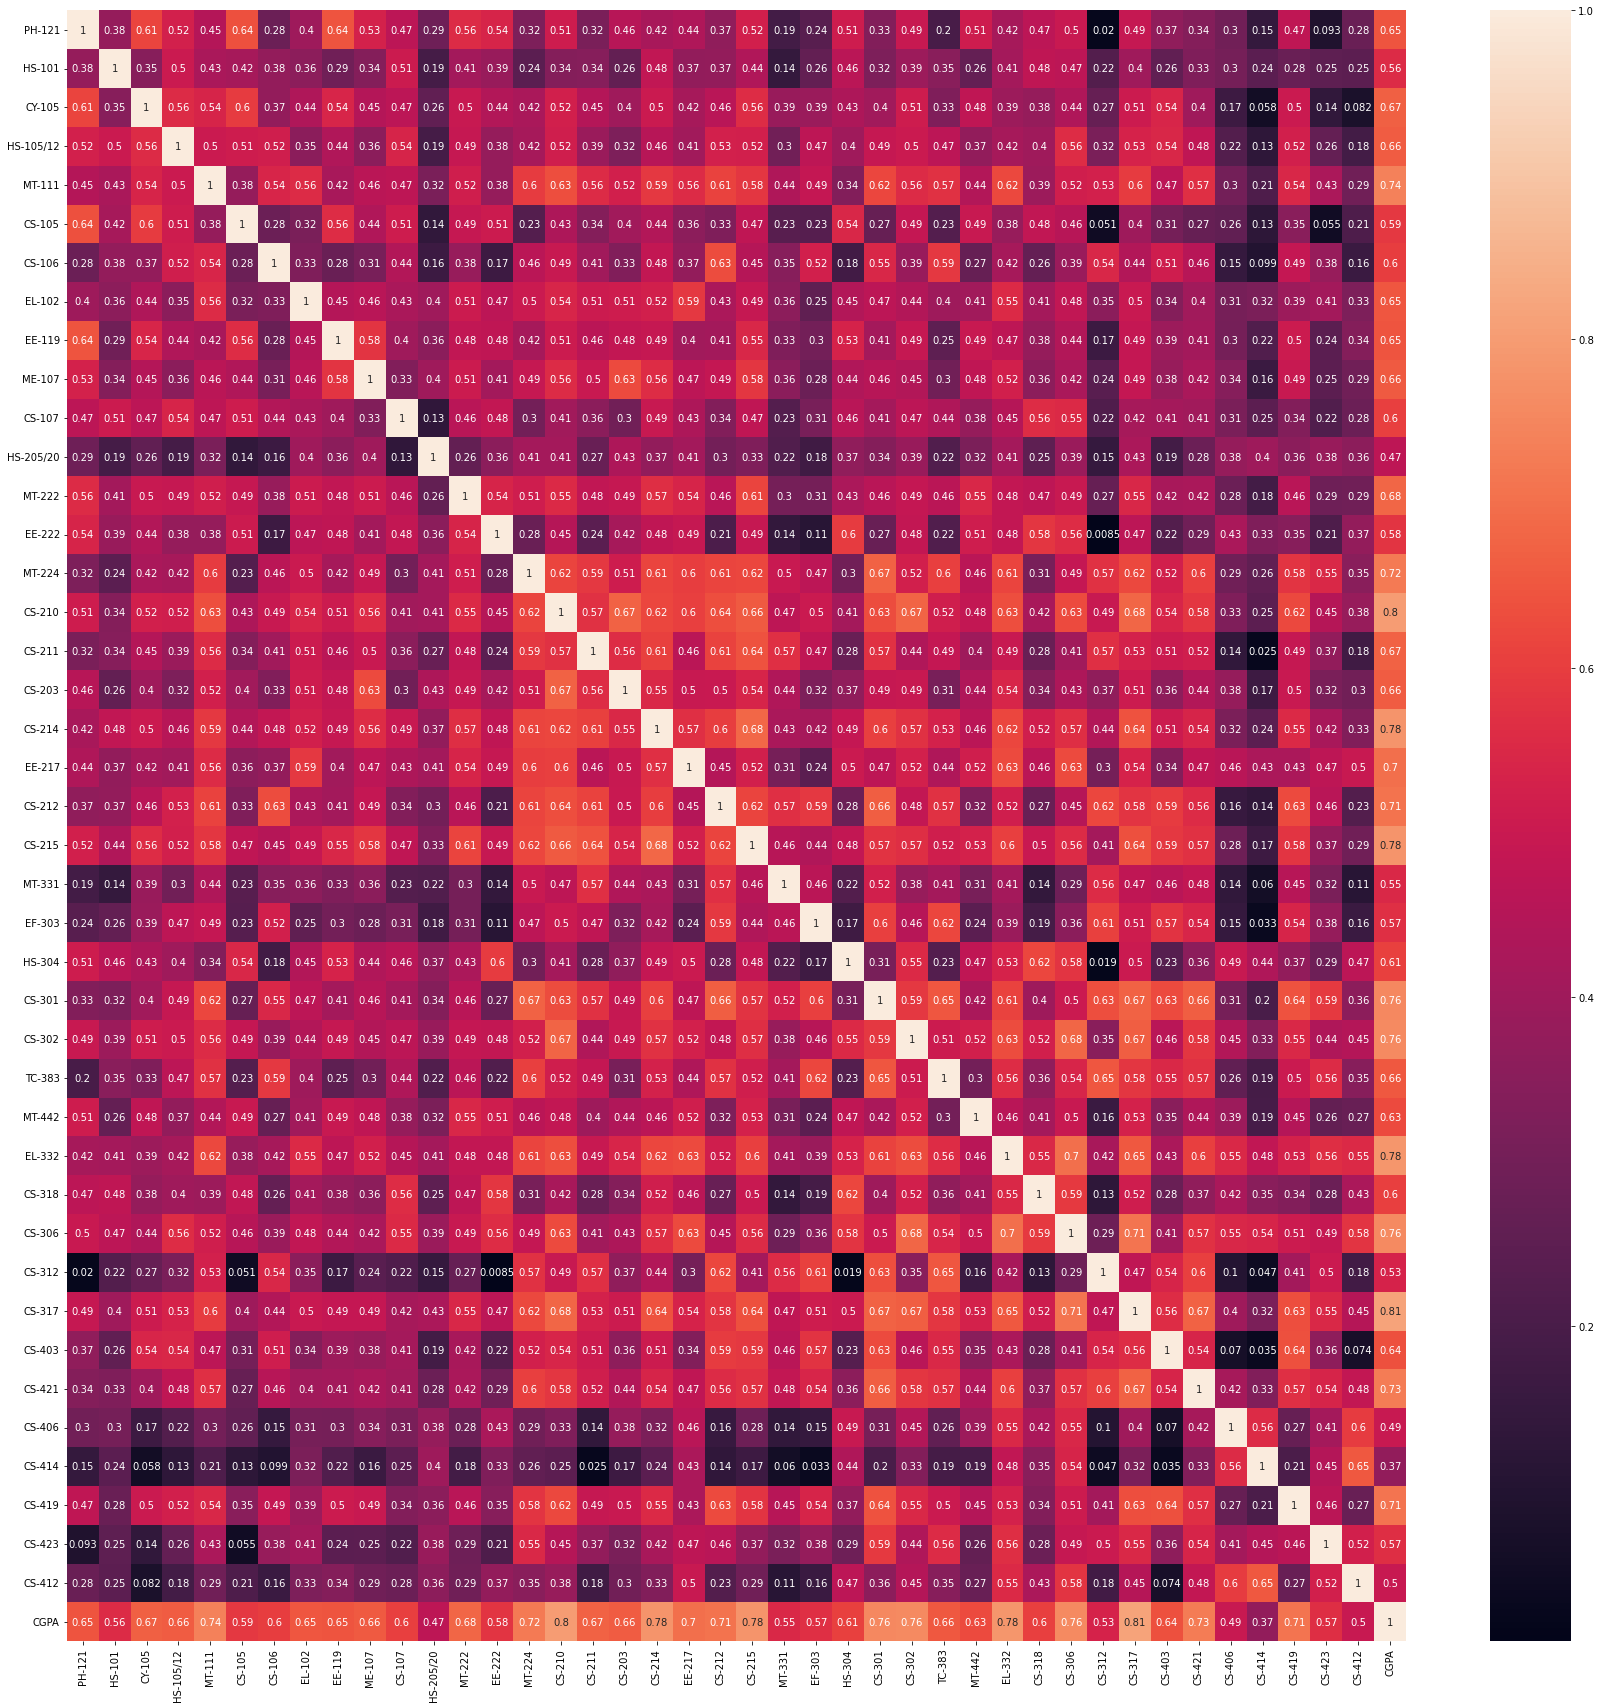

In [30]:
# Plotting heat map to check for labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(30,30))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [31]:
#Dividing data into features and label

X = data.drop(columns=['CGPA'])
Y= data['CGPA']

<function matplotlib.pyplot.show(close=None, block=None)>

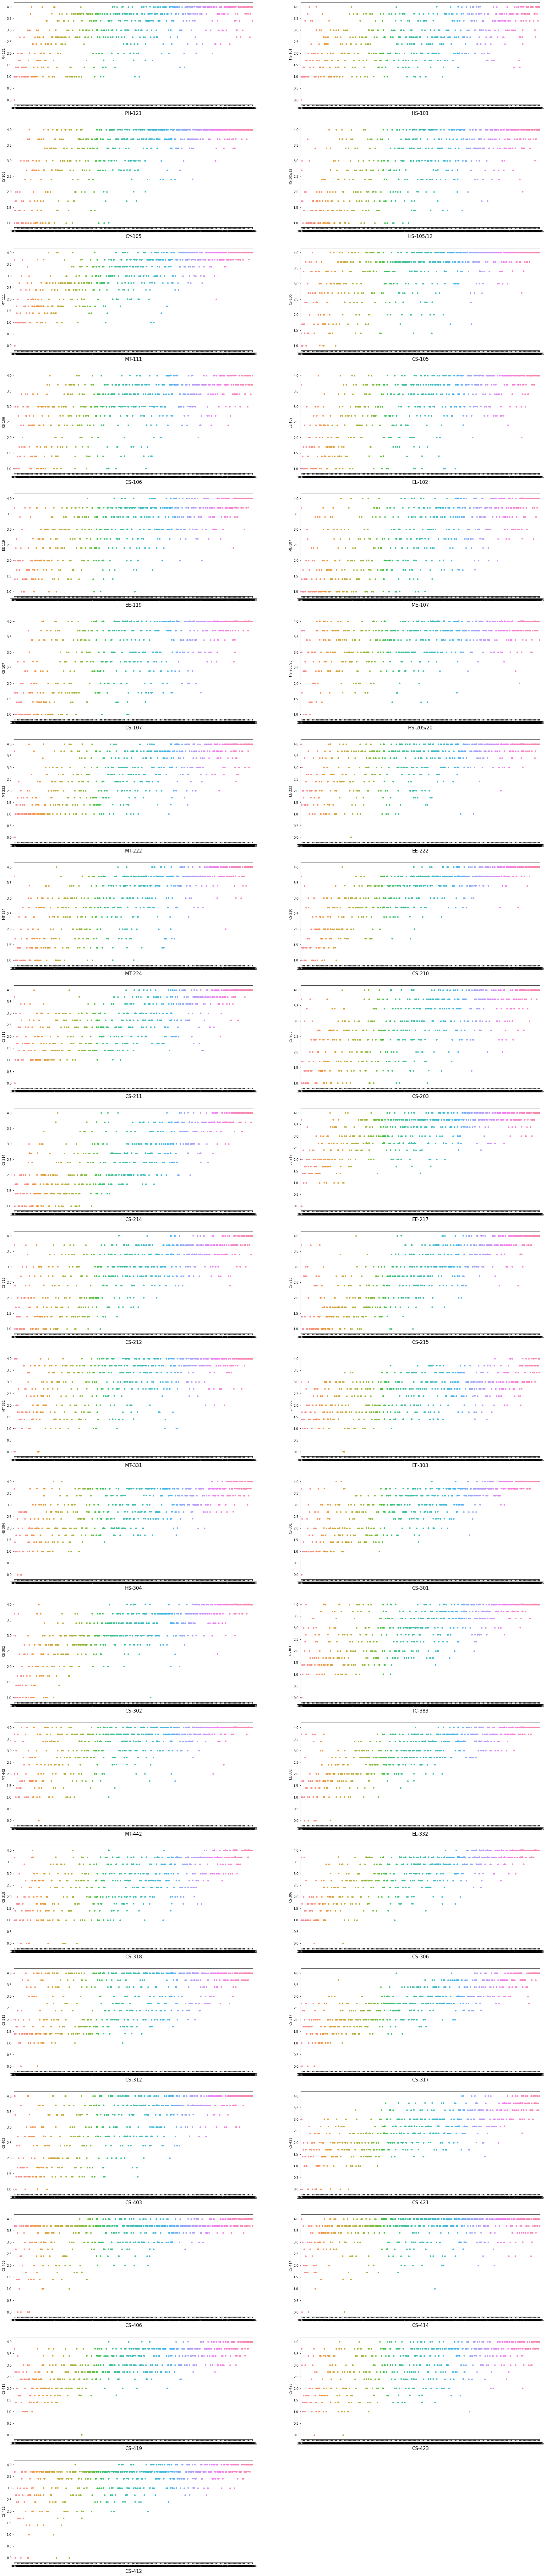

In [34]:
# Plotting relational graphs between features and label
plt.figure(figsize=(30,150))
plotnumber = 1
for column in X:
    if plotnumber <=41:
        ax= plt.subplot(21,2,plotnumber)
        sns.stripplot(Y,X[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show


In [35]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X,Y, test_size=0.30, random_state = 12)

In [36]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)
    
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [37]:
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9633681909432644
Accuracy of testing model : 0.9769966529945352
RMSE :  0.09258592841889839

-----------------------------------------



In [39]:
# Cross validation
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy= r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range (2,10):
    cv_score=cross_val_score(lr,X,Y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv_score is {cv_mean}, training accuracy is {Train_accuracy} and testing accuracy is {Test_accuracy}")
    print ("\n")

At cross fold 2 the cv_score is 0.8976969807531537, training accuracy is 0.9633681909432644 and testing accuracy is 0.9769966529945352


At cross fold 3 the cv_score is 0.9174301975912115, training accuracy is 0.9633681909432644 and testing accuracy is 0.9769966529945352


At cross fold 4 the cv_score is 0.8966275945727158, training accuracy is 0.9633681909432644 and testing accuracy is 0.9769966529945352


At cross fold 5 the cv_score is 0.9496212524281779, training accuracy is 0.9633681909432644 and testing accuracy is 0.9769966529945352


At cross fold 6 the cv_score is 0.9472022323419281, training accuracy is 0.9633681909432644 and testing accuracy is 0.9769966529945352


At cross fold 7 the cv_score is 0.9542820762973373, training accuracy is 0.9633681909432644 and testing accuracy is 0.9769966529945352


At cross fold 8 the cv_score is 0.9534400736299328, training accuracy is 0.9633681909432644 and testing accuracy is 0.9769966529945352


At cross fold 9 the cv_score is 0.9566724

In [ ]:
# As there not much difference we select CV as 9

<function matplotlib.pyplot.show(close=None, block=None)>

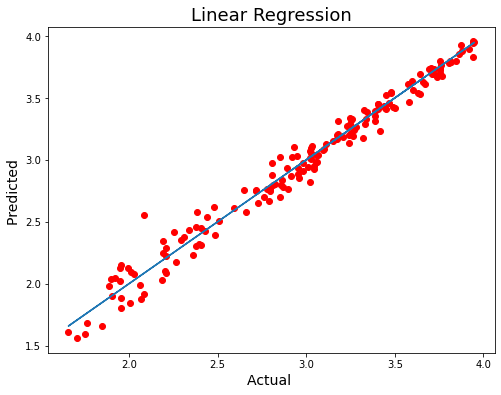

In [40]:
# Linear regression Graph:
plt.figure (figsize=(8,6))
plt.scatter(x=y_test,y=pred_test, color = 'r')
plt.plot(y_test,y_test)
plt.xlabel("Actual ", fontsize =14)
plt.ylabel("Predicted ", fontsize=14)
plt.title ("Linear Regression", fontsize = 18)
plt.show

In [41]:
#Regularisation
from sklearn.linear_model import Lasso

#Hyperparameter Tuining

parameters = {'alpha':[0.001, 0.01, 0.1,1,10],
             'random_state':list (range(0,10))}
ls = Lasso()
clf = RandomizedSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'random_state': 8, 'alpha': 0.01}


In [46]:
# Lasso Training
ls= Lasso(alpha=0.01, random_state=8)
model_selection(lr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9633681909432644
Accuracy of testing model : 0.9769966529945352
RMSE :  0.09258592841889839

-----------------------------------------



In [44]:
#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.8187147079924462
RMSE :  0.2599146479951144

-----------------------------------------



In [45]:
# Hyperparameter Tuning :

parameters = {'max_features':['auto','sqrt','log2'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = RandomizedSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 9}


In [51]:
dt1 = DecisionTreeRegressor(max_depth =9, min_samples_leaf = 3, min_samples_split = 3, max_features="auto")
model_selection(dt1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9640006129178211
Accuracy of testing model : 0.8478070587227124
RMSE :  0.23814788320955116

-----------------------------------------



In [52]:
#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9870339949701737
Accuracy of testing model : 0.9452051448229891
RMSE :  0.14289576644279126

-----------------------------------------



In [53]:
# Hyperparameter Tuning:
parameters = {'n_estimators':range(25,30),
    'max_features':['auto','sqrt','log2'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'n_estimators': 28, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 8}


In [54]:
rf1= RandomForestRegressor(n_estimators=28,max_features='log2', max_depth = 8, min_samples_leaf = 3, min_samples_split = 5)
model_selection(rf1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9491965261253544
Accuracy of testing model : 0.9376097664459211
RMSE :  0.15247820690755978

-----------------------------------------



In [55]:
#Support Vector Regressor:
svr = SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9781328656599776
Accuracy of testing model : 0.9660270230072283
RMSE :  0.11251651520150588

-----------------------------------------



In [56]:
# Hyperparameter Tuning :

parameters = {'kernel':['linear','rbf','sigmoid'],
    'gamma': ['scale','auto']
    }

clf = RandomizedSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'kernel': 'rbf', 'gamma': 'auto'}


In [58]:
svr1 = SVR(kernel='rbf',gamma='auto')
model_selection(svr1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9762696262495887
Accuracy of testing model : 0.9736904256623039
RMSE :  0.0990162287654536

-----------------------------------------



In [ ]:
#Since Accuracy is high and RMSE is lower for svr1
# I am going to use SVR

In [59]:
# Saving Model
import pickle
filename= 'Grade.pkl'
pickle.dump(svr1,open(filename, 'wb'))

In [60]:
a= np.array(y_test)
predicted=np.array (svr1.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,3.668,3.615947
1,3.578,3.470538
2,3.443,3.385138
3,2.429,2.347071
4,3.182,3.175106
...,...,...
160,2.028,2.033511
161,3.058,2.977304
162,2.984,2.952523
163,2.823,2.786982
